In [1]:
%run imports.py

In [2]:
cart = '/home/davini/work/globone/runtime/DIBBA_KM312L70/'

In [3]:
finam = 'GLOBONE_atm_6hrs_{}.nc'

In [46]:
globon = xr.open_mfdataset(cart + 'GLOBONE_atm_6hrs_*.nc')

In [47]:
globon

<xarray.Dataset>
Dimensions:    (latitude: 90, longitude: 128, plevel: 8, time: 51135)
Coordinates:
  * longitude  (longitude) float32 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * latitude   (latitude) float32 -90.0 -87.98 -85.96 ... 85.96 87.98 90.0
  * plevel     (plevel) float32 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 ... 2013-12-31T18:00:00
Data variables: (12/30)
    tas        (time, latitude, longitude) float32 dask.array<chunksize=(1459, 90, 128), meta=np.ndarray>
    pr         (time, latitude, longitude) float32 dask.array<chunksize=(1459, 90, 128), meta=np.ndarray>
    evspsbl    (time, latitude, longitude) float32 dask.array<chunksize=(1459, 90, 128), meta=np.ndarray>
    ps         (time, latitude, longitude) float32 dask.array<chunksize=(1459, 90, 128), meta=np.ndarray>
    psl        (time, latitude, longitude) float32 dask.array<chunksize=(1459, 90, 128), meta=np.ndarray>
    rlut       (time, latitude, longitude) float32 dask.array<chunksize=(1459, 90, 128), meta=np.ndarray>
    ...         ...
    zg         (time, plevel, latitude, longitude) float32 dask.array<chunksize=(1459, 8, 90, 128), meta=np.ndarray>
    wap        (time, plevel, latitude, longitude) float32 dask.array<chunksize=(1459, 8, 90, 128), meta=np.ndarray>
    tasmin     (time, latitude, longitude) float32 dask.array<chunksize=(1459, 90, 128), meta=np.ndarray>
    tasmax     (time, latitude, longitude) float32 dask.array<chunksize=(1459, 90, 128), meta=np.ndarray>
    fices      (time, latitude, longitude) float32 dask.array<chunksize=(1459, 90, 128), meta=np.ndarray>
    test       (time, latitude, longitude) float32 dask.array<chunksize=(1459, 90, 128), meta=np.ndarray>
Attributes:
    note:     GLOBONE NetCDF4 experimental output file
    history:  Created on 20220915
    Source:   GLOBONE v0.1
    Author:   CNR-ISAC

In [12]:
cloud = globon['clt']

In [13]:
cloud_clim = cloud.mean('time')

/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


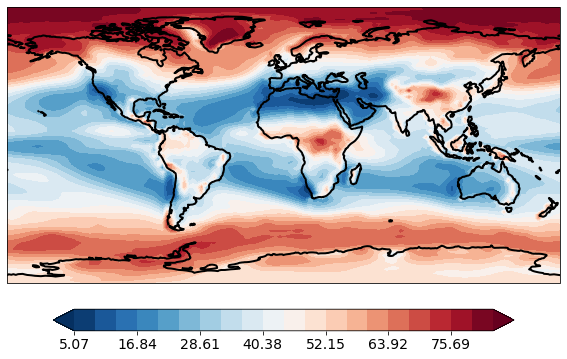

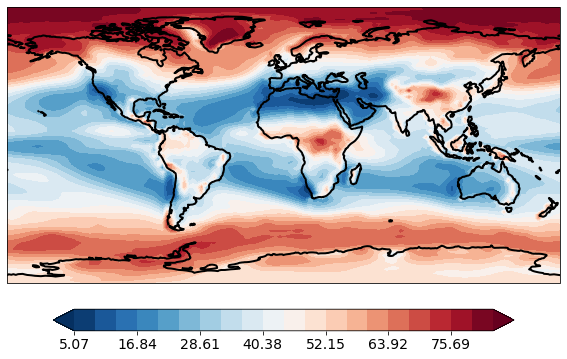

In [15]:
ctl.plot_map_contour(cloud_clim, lat = cloud_clim.latitude, lon = cloud_clim.longitude)

In [16]:
ceres_fi = '/nas/reference/CERES/CERES_2000-2015_monclim.nc'
ceres = xr.load_dataset(ceres_fi)

In [17]:
ceres_clim = ceres.mean('time')

In [18]:
ceres_clim

<xarray.Dataset>
Dimensions:               (lat: 180, lon: 360)
Coordinates:
  * lon                   (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                   (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    toa_sw_clr_mon        (lat, lon) float32 114.7 114.7 114.7 ... 88.48 88.48
    toa_sw_all_mon        (lat, lon) float32 119.3 119.3 119.3 ... 101.0 101.0
    toa_lw_clr_mon        (lat, lon) float32 136.9 136.9 136.9 ... 198.8 198.8
    toa_lw_all_mon        (lat, lon) float32 140.4 140.4 140.4 ... 192.6 192.6
    toa_solar_all_mon     (lat, lon) float32 172.7 172.7 172.7 ... 171.5 171.5
    cldarea_high_mon      (lat, lon) float32 3.279 3.279 3.279 ... 0.609 0.609
    cldarea_mid_high_mon  (lat, lon) float32 27.88 27.88 27.88 ... 13.04 13.04
    cldarea_mid_low_mon   (lat, lon) float32 20.45 20.45 20.45 ... 8.925 8.925
    cldarea_low_mon       (lat, lon) float32 0.2436 0.2436 ... 56.17 56.17
    cldarea_total_mon     (lat, lon) float32 51.61 51.61 51.61 ... 78.74 78.74

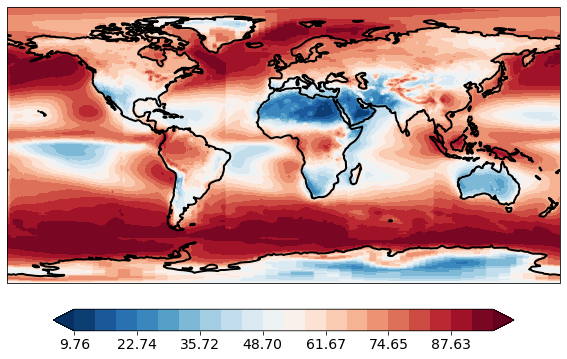

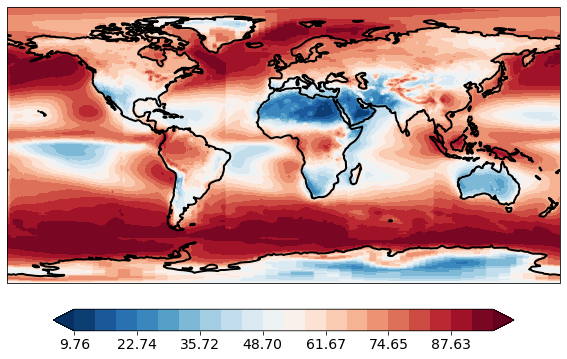

In [19]:
ctl.plot_map_contour(ceres_clim['cldarea_total_mon'])

In [ ]:
cloud_clim = cloud_clim.rename({'longitude': 'lon','latitude': 'lat'})

In [24]:
cloud_clim_rg = ctl.regrid_dataset(cloud_clim, regrid_to_reference=ceres_clim)
globo_cloud_bias = (cloud_clim_rg-ceres_clim['cldarea_total_mon'])/ceres_clim['cldarea_total_mon']

Regridding...


/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.131025


/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


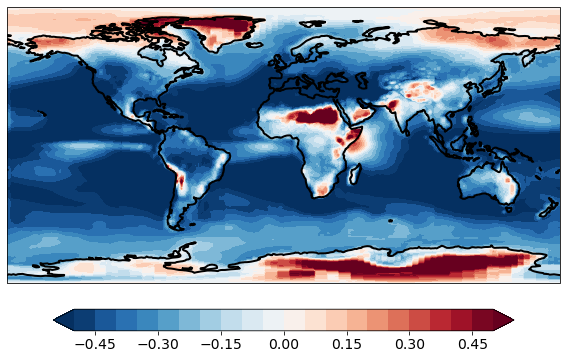

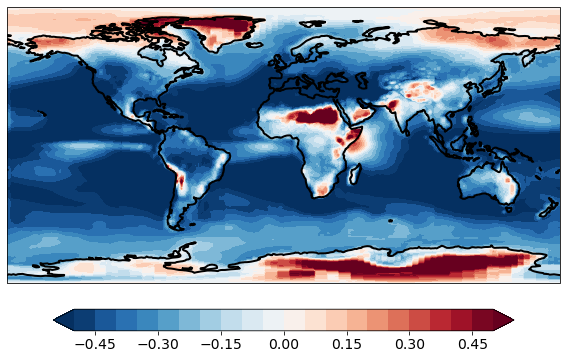

In [26]:
ctl.plot_map_contour(globo_cloud_bias, plot_anomalies=True, cbar_range=(-0.5, 0.5))

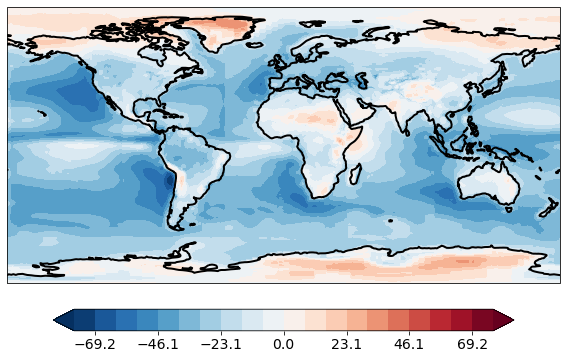

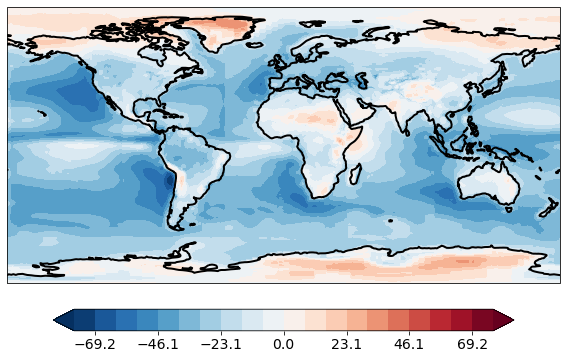

In [27]:
ctl.plot_map_contour(cloud_clim_rg-ceres_clim['cldarea_total_mon'], plot_anomalies=True)

[<Figure size 1080x864 with 3 Axes>]

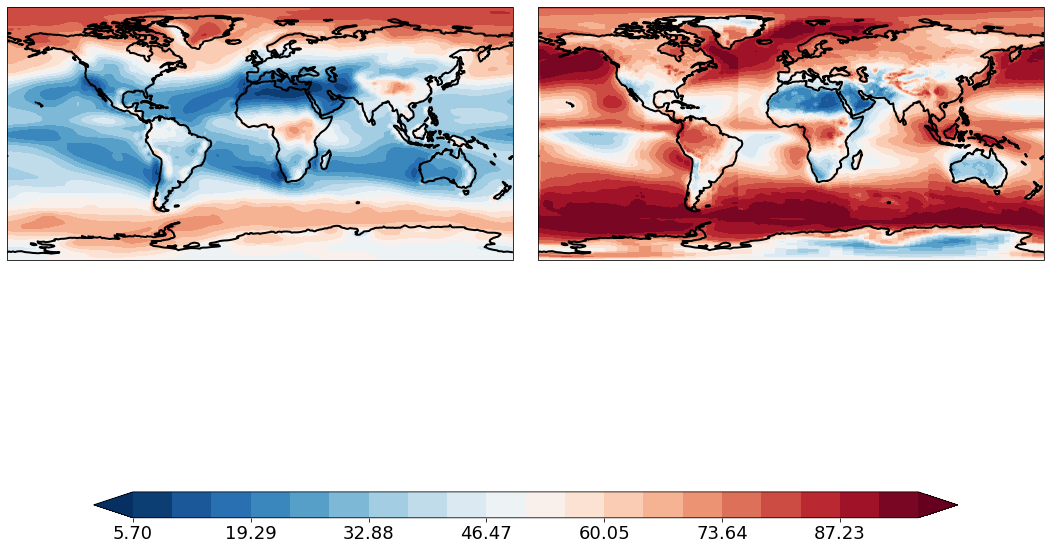

In [32]:
ctl.plot_multimap_contour([cloud_clim_rg, ceres_clim['cldarea_total_mon']])

In [34]:
ceres_clim

<xarray.Dataset>
Dimensions:               (lat: 180, lon: 360)
Coordinates:
  * lon                   (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                   (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    toa_sw_clr_mon        (lat, lon) float32 114.7 114.7 114.7 ... 88.48 88.48
    toa_sw_all_mon        (lat, lon) float32 119.3 119.3 119.3 ... 101.0 101.0
    toa_lw_clr_mon        (lat, lon) float32 136.9 136.9 136.9 ... 198.8 198.8
    toa_lw_all_mon        (lat, lon) float32 140.4 140.4 140.4 ... 192.6 192.6
    toa_solar_all_mon     (lat, lon) float32 172.7 172.7 172.7 ... 171.5 171.5
    cldarea_high_mon      (lat, lon) float32 3.279 3.279 3.279 ... 0.609 0.609
    cldarea_mid_high_mon  (lat, lon) float32 27.88 27.88 27.88 ... 13.04 13.04
    cldarea_mid_low_mon   (lat, lon) float32 20.45 20.45 20.45 ... 8.925 8.925
    cldarea_low_mon       (lat, lon) float32 0.2436 0.2436 ... 56.17 56.17
    cldarea_total_mon     (lat, lon) float32 51.61 51.61 51.61 ... 78.74 78.74

In [35]:
era_cloud = xr.open_mfdataset('/nas/reference/ERAInterim/monthly/tcc/tcc*nc')

In [36]:
era_cloud_clim = era_cloud.mean('time')

In [37]:
era_cloud_clim_rg = ctl.regrid_dataset(era_cloud_clim, regrid_to_reference=ceres_clim)

Regridding...
Regridding completed in 0:00:02.730943


/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/xesmf/frontend.py:496: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


[<Figure size 1296x504 with 4 Axes>]

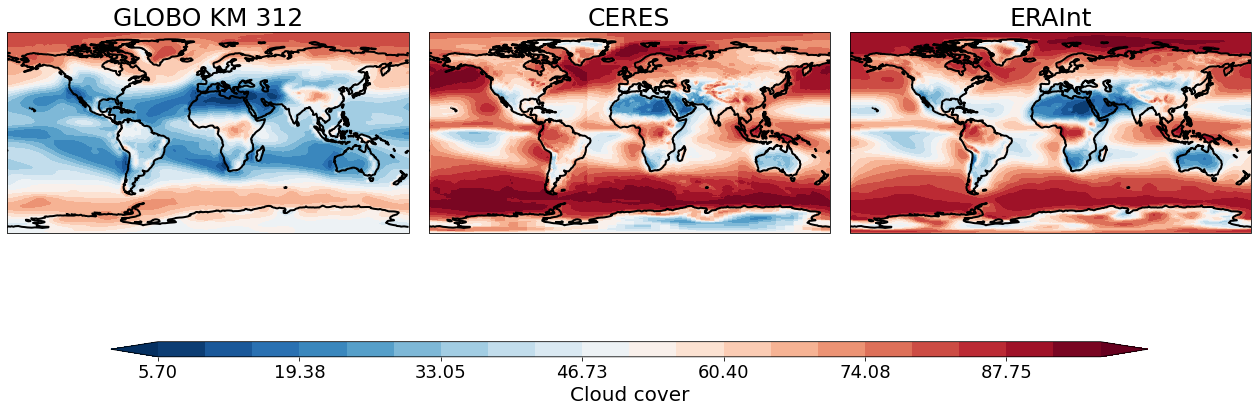

In [44]:
ctl.plot_multimap_contour([cloud_clim_rg, ceres_clim['cldarea_total_mon'], 100*era_cloud_clim_rg['tcc']], figsize = (18,7), subtitles = ['GLOBO KM 312', 'CERES', 'ERAInt'], cb_label = 'Cloud cover', fix_subplots_shape=(1,3))

## Shortwave flux at TOA

In [51]:
varname = 'rsnt'
var = globon[varname].mean('time').rename({'longitude': 'lon','latitude': 'lat'})
var_ceres = ceres_clim['toa_solar_all_mon']-ceres_clim['toa_sw_all_mon']

In [53]:
var_era = xr.open_mfdataset('/nas/reference/ERAInterim/monthly/rsnt/rsnt*nc')

In [55]:
var_era = var_era['tsr'].mean('time')
var_rg = ctl.regrid_dataset(var, regrid_to_reference=var_ceres)
var_era_rg = ctl.regrid_dataset(var_era, regrid_to_reference=var_ceres)

Regridding...


/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/dataarray.py:745: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, *

Regridding completed in 0:00:00.998560
Regridding...
Regridding completed in 0:00:02.102866


/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


[<Figure size 1296x504 with 4 Axes>]

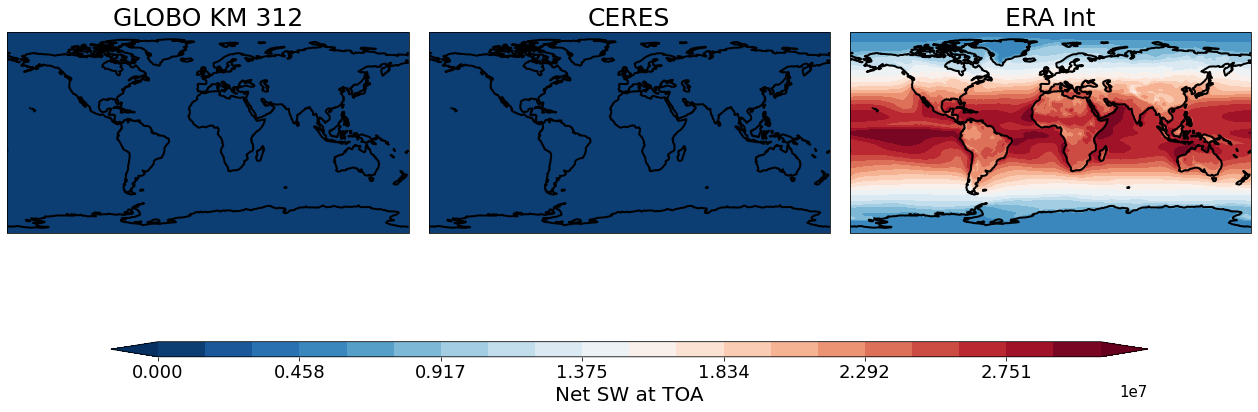

In [57]:
ctl.plot_multimap_contour([var_rg, var_ceres, var_era_rg], figsize = (18,7), subtitles = ['GLOBO KM 312', 'CERES', 'ERA Int'], cb_label = 'Net SW at TOA', fix_subplots_shape=(1,3))

[<Figure size 1296x504 with 4 Axes>]

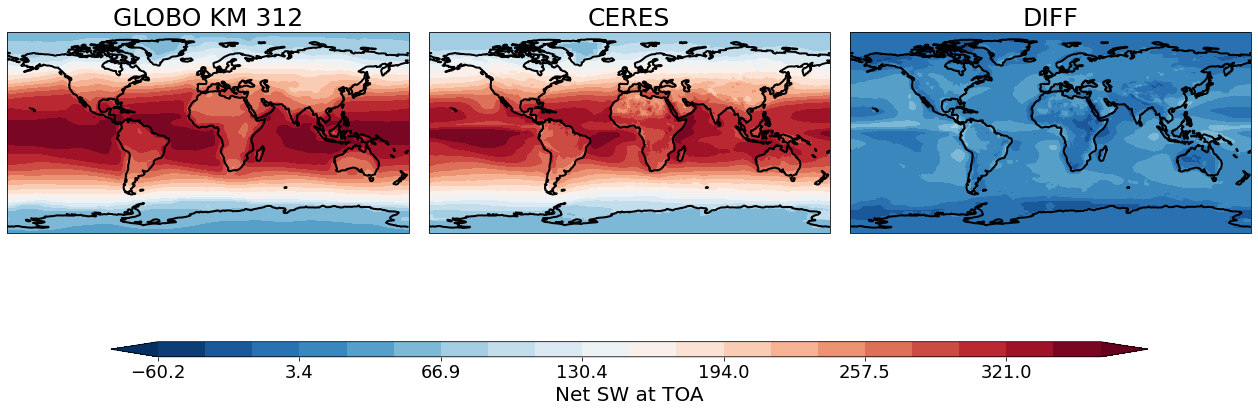

In [59]:
ctl.plot_multimap_contour([var_rg, var_ceres, var_rg-var_ceres], figsize = (18,7), subtitles = ['GLOBO KM 312', 'CERES', 'DIFF'], cb_label = 'Net SW at TOA', fix_subplots_shape=(1,3))

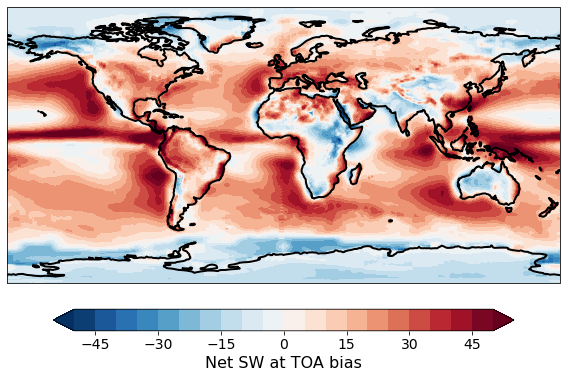

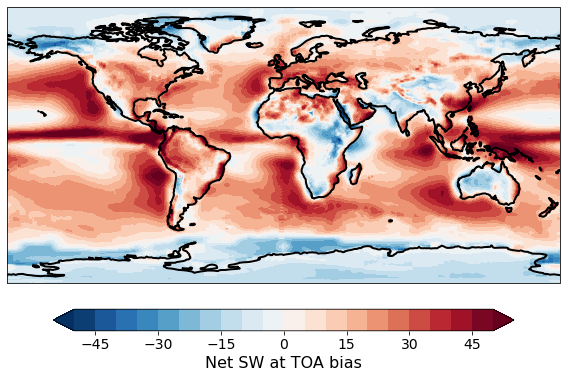

In [62]:
ctl.plot_map_contour(var_rg-var_ceres, cb_label = 'Net SW at TOA bias', plot_anomalies = True, cbar_range=(-50, 50))

## Precipitation

In [67]:
varname = 'pr'
var = globon[varname].mean('time').rename({'longitude': 'lon','latitude': 'lat'})
var_era = xr.open_mfdataset('/nas/reference/ERAInterim/monthly/pr/pr*nc')
var_era = var_era['tp'].rename({'longitude': 'lon','latitude': 'lat'}).mean('time')
var_rg = ctl.regrid_dataset(var, regrid_to_reference=var_era)

Regridding...


/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.757414


/home/fabiano/work/miniconda3/envs/ctl4/lib/python3.9/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


In [68]:
var_era

<xarray.DataArray 'tp' (lat: 241, lon: 480)>
dask.array<mean_agg-aggregate, shape=(241, 480), dtype=float32, chunksize=(241, 480), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
  * lat      (lat) float32 90.0 89.25 88.5 87.75 ... -87.75 -88.5 -89.25 -90.0

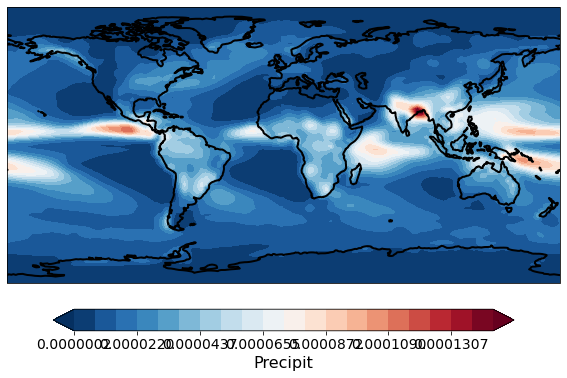

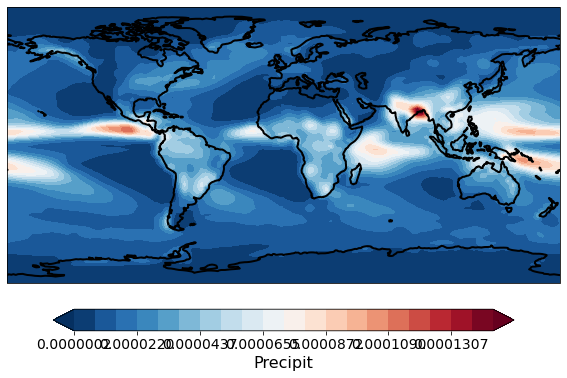

In [70]:
ctl.plot_map_contour(var_rg, cb_label = 'Precipit')

[<Figure size 1152x648 with 3 Axes>]

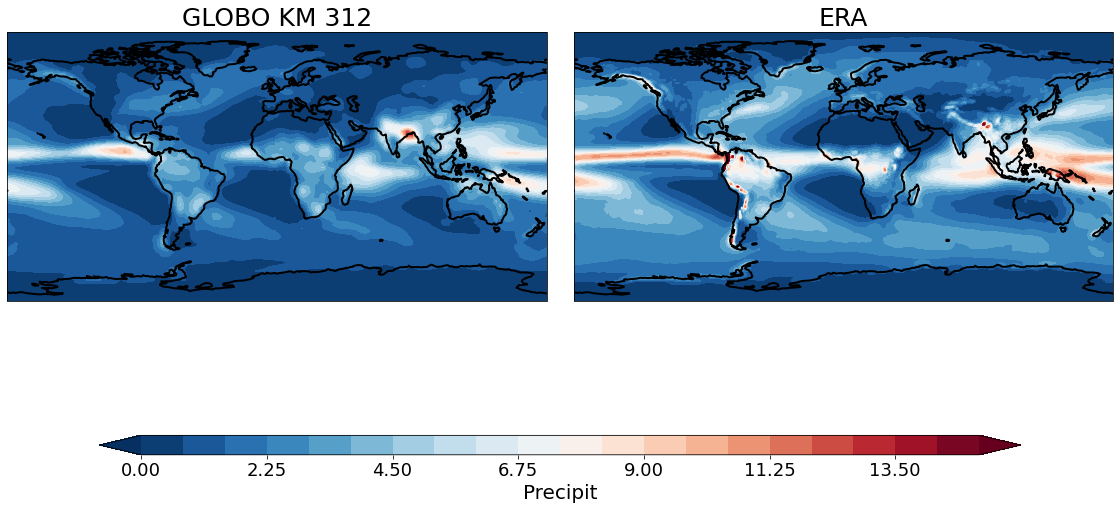

In [73]:
ctl.plot_multimap_contour([var_rg*86400., var_era*1000], figsize = (16,9), subtitles = ['GLOBO KM 312', 'ERA'], cb_label = 'Precipit', fix_subplots_shape=(1,2), cbar_range = (0, 15))

[<Figure size 1152x648 with 3 Axes>]

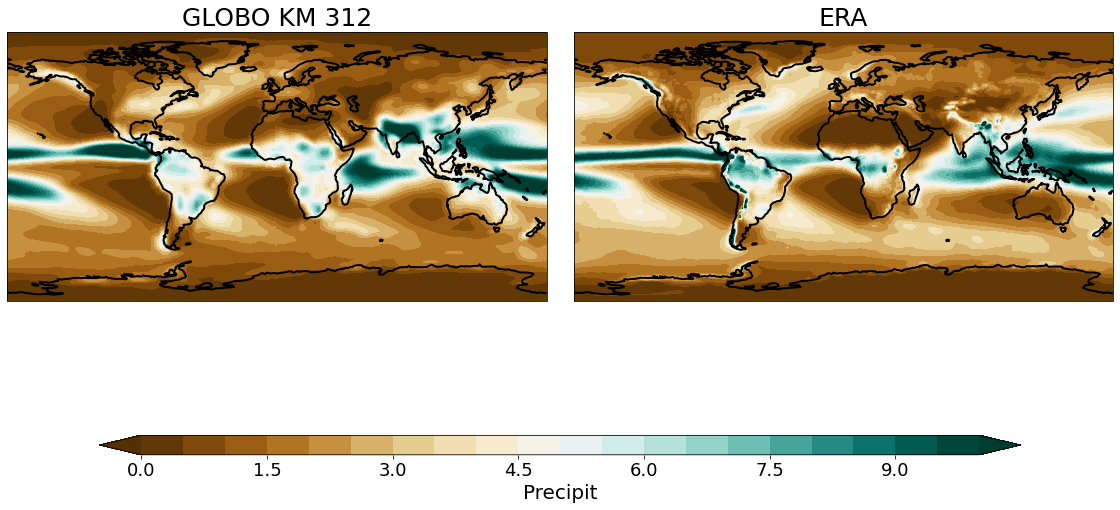

In [75]:
ctl.plot_multimap_contour([1.5*var_rg*86400., var_era*1000], figsize = (16,9), subtitles = ['GLOBO KM 312', 'ERA'], cb_label = 'Precipit', fix_subplots_shape=(1,2), cbar_range = (0, 10), cmap='BrBG')

[<Figure size 1152x648 with 2 Axes>]

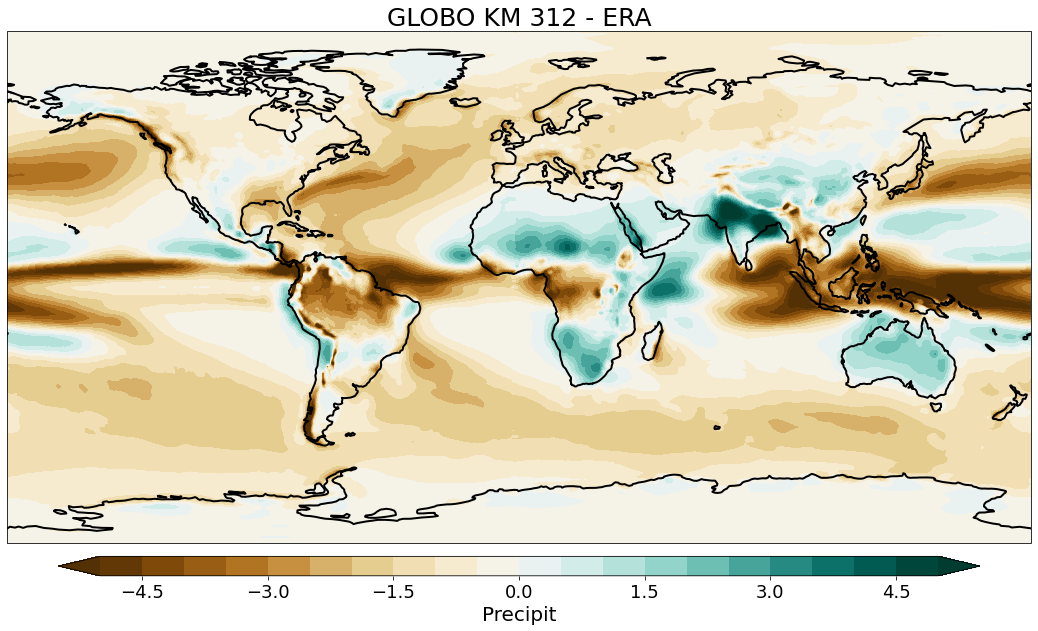

In [81]:
ctl.plot_multimap_contour([(var_rg*86400-var_era*1000)], figsize = (16,9), subtitles = ['GLOBO KM 312 - ERA'], cb_label = 'Precipit', cbar_range = (-5, 5), cmap='BrBG')